In [1]:
# logistics regression is a classfication algoritm used to predict discrete / categorical values
# who will default on their credit card payment?
# predict if a person will buy SUV based on age and estimated salary

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

##### Importing dataset

In [34]:
social_network = pd.read_csv('C:\\Users\\421803\\Desktop\\Tat\\Python\\ML Algorithms dataset\\SocialNetworkAds.csv')

In [35]:
social_network

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### Extracting the independent variables

In [36]:
X = social_network.iloc[:,[2,3]].values

#### Extracting the dependent variables

In [38]:
y = social_network.iloc[:,4].values

#### Visualizing the dataset

In [39]:
social_network_without_gender = social_network.loc[:, social_network.columns!='Gender']

<Axes: >

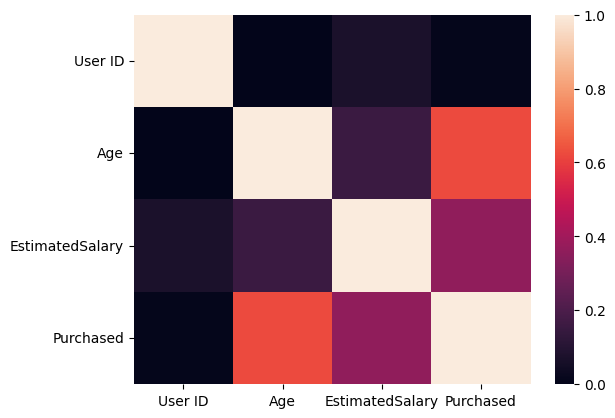

In [40]:
sns.heatmap(social_network_without_gender.corr())

#### Split the dataset into Training and testing set:

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.25,random_state = 0)

#### Feature Scailling - normalization

In [57]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

#### Fit Logistic Regression to Training dataset

In [58]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state = 0)
logr.fit(X_train,y_train)

LogisticRegression(random_state=0)

#### Predicting the test set results:

In [61]:
y_pred = logr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

#### Visualize the train set results:

C:\Users\421803\AppData\Local\Temp\ipykernel_18948\314033379.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],


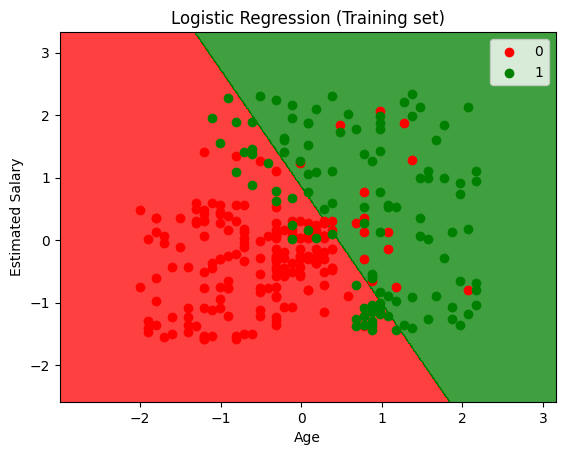

In [64]:
from matplotlib.colors import ListedColormap
X_set,y_set = X_train,y_train
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1,step = 0.01))
plt.contourf(X1, X2, logr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green'))(i),label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


C:\Users\421803\AppData\Local\Temp\ipykernel_18948\1012888049.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],


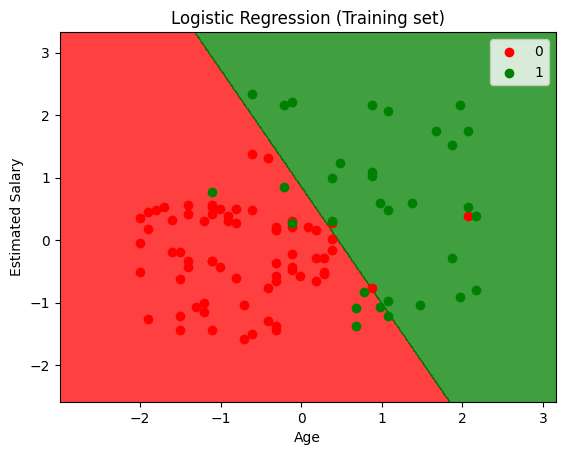

In [65]:
#### Visualising the test set results
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min() - 1, stop = X_set[:,0].max() + 1,step = 0.01),
                    np.arange(start = X_set[:,1].min() - 1, stop = X_set[:,1].max() + 1,step = 0.01))
plt.contourf(X1, X2, logr.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
                c = ListedColormap(('red','green'))(i),label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


#### Evaluating the model

In [66]:
# Evaluate the model using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]], dtype=int64)

In [ ]:
# Accuracy = (65 + 24) / (65 + 3 + 8 + 24) = 89%